**Learning Python -- The Programming Language for Artificial Intelligence and Data Science**

**Lecture: Introduction to Machine Learning and Neural Networks**

By Allen Y. Yang, PhD

(c) Copyright Intelligent Racing Inc., 2021-2024. All rights reserved. Materials may NOT be distributed or used for any commercial purposes.

# Keywords

* **Machine Learning**: Computer algorithms and mathematical models that allow computers to automatically recognize patterns and infer optimal problem-solving strategies.
* **Artificial Intelligence (AI)**: The broader field of creating intelligent machines that can perform tasks typically requiring human intelligence.
* **Neural Network**: A computational model inspired by biological neurons, consisting of interconnected nodes that process information.
* **Perceptron**: The simplest form of neural network with a single neuron, capable of binary classification.
* **Classification**: The task of predicting which category or class an input belongs to.
* **Activation Function**: A mathematical function that determines the output of a neuron based on its input.
* **Supervised Learning**: Learning from labeled examples where the correct outputs are provided during training.
* **TensorFlow/Keras**: Popular open-source libraries for building and training neural networks.

# A Brief History of AI

## Dependencies for this notebook
This notebook uses only:
- **numpy**: For numerical computations
- **matplotlib**: For visualizations
- **tensorflow 2.12**: For building neural networks

No other external libraries are required!

## From Automatons to Artificial Intelligence

The dream of creating intelligent machines has captivated humanity for centuries:

1. **Automatons (1st century)**: Mechanical devices that could perform pre-programmed movements
2. **Robots (1920s)**: The term "robot" was coined in Karel Čapek's play "Rossum's Universal Robots"
3. **Turing Test (1950)**: Alan Turing proposed a test for machine intelligence
4. **Modern AI**: Deep learning, neural networks, and systems that surpass human performance

## The Turing Test

Alan Turing asked: Can a machine think? His test involves:
- A human interrogator (C) communicates with both a human (B) and a computer (A)
- If C cannot reliably distinguish between A and B, the computer passes the test

Mathematically: Given input x from C, find a program f(·; θ) such that:
$$y^*(x) = f(x; θ) \sim y_{human}(x)$$

# Modern AI Achievements

## Natural Language Processing
- Virtual assistants (Siri, Alexa)
- GPT models approaching human-like conversation

## Image Recognition
- Deep learning surpassed human accuracy in ImageNet (2015)
- Object detection in real-time

## Reinforcement Learning
- AlphaGo defeating world champions (2016)
- AlphaStar mastering StarCraft II (2019)

Let's visualize the progress in image recognition:

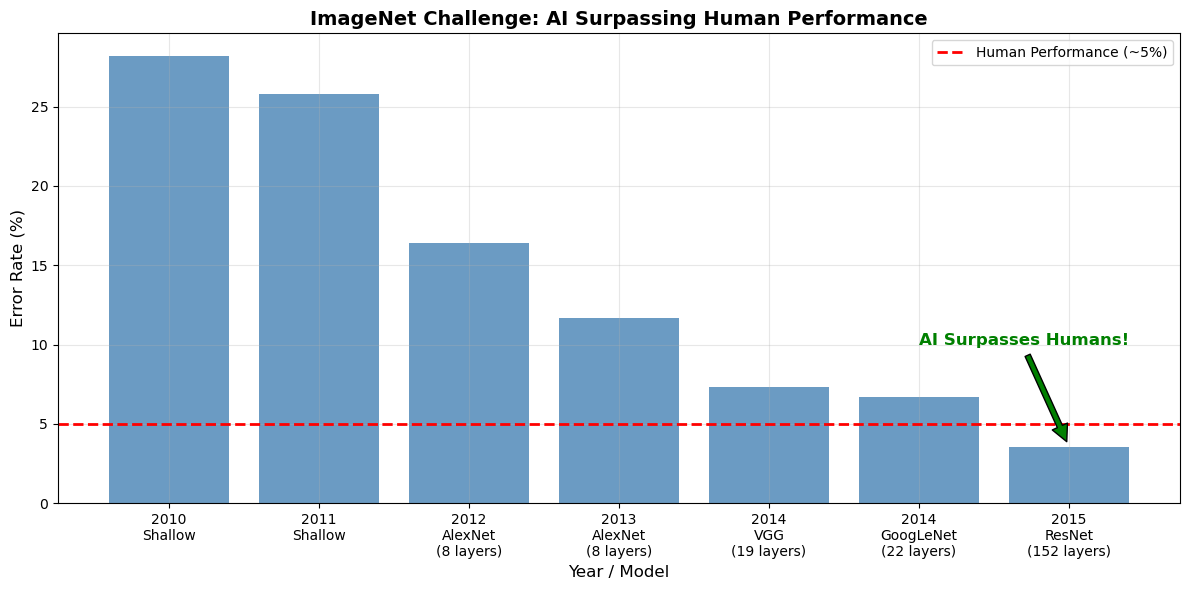

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set matplotlib style for better-looking plots
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

# ImageNet Challenge Results
years = [2010, 2011, 2012, 2013, 2014, 2014, 2015]
models = ['Shallow', 'Shallow', 'AlexNet\n(8 layers)', 'AlexNet\n(8 layers)', 
          'VGG\n(19 layers)', 'GoogLeNet\n(22 layers)', 'ResNet\n(152 layers)']
error_rates = [28.2, 25.8, 16.4, 11.7, 7.3, 6.7, 3.57]

# Create figure
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(years)), error_rates, color='steelblue', alpha=0.8)

# Add human performance line
plt.axhline(y=5.0, color='red', linestyle='--', linewidth=2, label='Human Performance (~5%)')

# Customize plot
plt.xlabel('Year / Model', fontsize=12)
plt.ylabel('Error Rate (%)', fontsize=12)
plt.title('ImageNet Challenge: AI Surpassing Human Performance', fontsize=14, fontweight='bold')
plt.xticks(range(len(years)), [f"{y}\n{m}" for y, m in zip(years, models)], rotation=0, ha='center')
plt.legend()
plt.grid(True, alpha=0.3)

# Highlight when AI beat humans
plt.annotate('AI Surpasses Humans!', xy=(6, 3.57), xytext=(5, 10),
            arrowprops=dict(facecolor='green', shrink=0.05),
            fontsize=12, fontweight='bold', color='green')

plt.tight_layout()
plt.show()

# Machine Learning Paradigms

## Traditional Programming vs Machine Learning

**Traditional Programming:**
- Input: Data + Rules
- Output: Answers

**Machine Learning:**
- Input: Data + Answers
- Output: Rules

## Types of Machine Learning

1. **Supervised Learning**: Learn from labeled examples
2. **Unsupervised Learning**: Find patterns without labels
3. **Reinforcement Learning**: Learn through interaction and rewards

# Classification Problems

Classification is one of the fundamental tasks in machine learning. Given input data x, predict its class label y.

## Example: Binary Classification

Let's create a simple 2D dataset that is linearly separable:

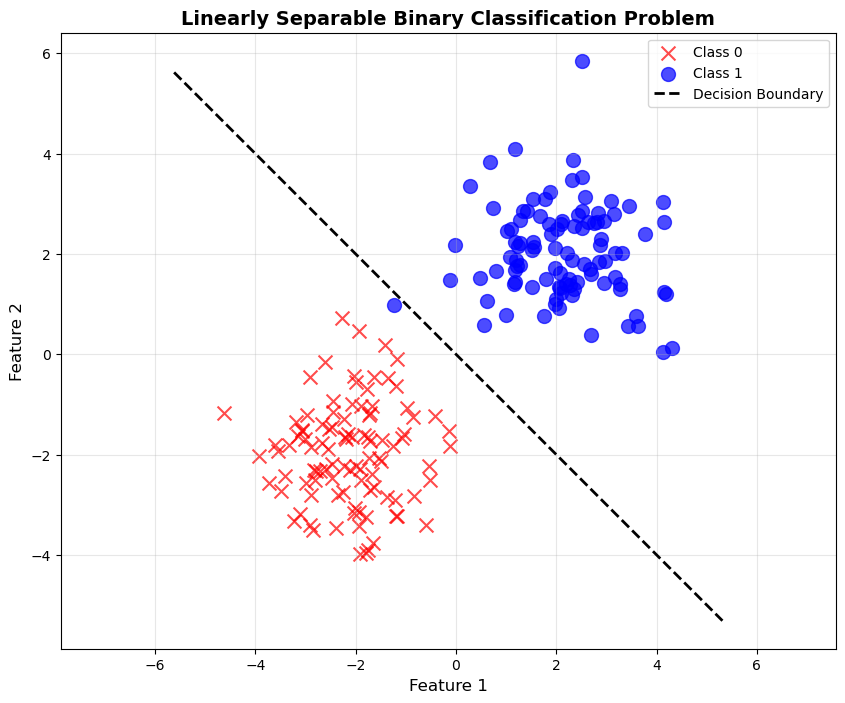

Dataset shape: (200, 2)
Number of samples per class: 100


In [2]:
# Generate synthetic data for binary classification
np.random.seed(42)

# Class 0 (red crosses)
n_samples = 100
class0_x = np.random.randn(n_samples, 2) + [-2, -2]
class0_y = np.zeros(n_samples)

# Class 1 (blue dots)
class1_x = np.random.randn(n_samples, 2) + [2, 2]
class1_y = np.ones(n_samples)

# Combine data
X = np.vstack([class0_x, class1_x])
y = np.hstack([class0_y, class1_y])

# Visualize the data
plt.figure(figsize=(10, 8))
plt.scatter(class0_x[:, 0], class0_x[:, 1], c='red', marker='x', s=100, label='Class 0', alpha=0.7)
plt.scatter(class1_x[:, 0], class1_x[:, 1], c='blue', marker='o', s=100, label='Class 1', alpha=0.7)

# Add decision boundary (we'll calculate this later)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x_line = np.array([x_min, x_max])
y_line = -x_line  # Simple diagonal line for illustration
plt.plot(x_line, y_line, 'k--', linewidth=2, label='Decision Boundary')

plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Linearly Separable Binary Classification Problem', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

print(f"Dataset shape: {X.shape}")
print(f"Number of samples per class: {n_samples}")

# The Perceptron Model

## Biological Inspiration

The perceptron is inspired by biological neurons:
- **Dendrites**: Receive input signals
- **Cell body**: Aggregates inputs
- **Axon**: Transmits output signal
- **All-or-none principle**: Neuron fires if input exceeds threshold

## Mathematical Model

For inputs $x_1, x_2, ..., x_n$ with weights $w_1, w_2, ..., w_n$ and bias $w_0$:

1. **Weighted sum**: $z = \sum_{i=1}^{n} w_i x_i + w_0$

2. **Activation function**:
   - Step function: $f(z) = \begin{cases} 1 & \text{if } z > 0 \\ 0 & \text{if } z \leq 0 \end{cases}$
   - Sigmoid function: $\sigma(z) = \frac{1}{1 + e^{-z}}$

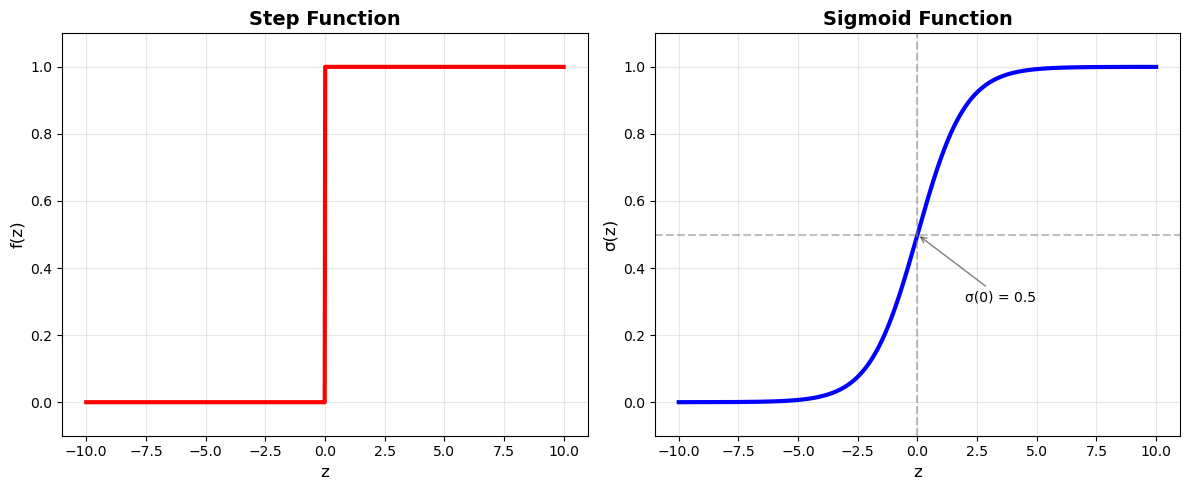

In [3]:
# Visualize activation functions
z = np.linspace(-10, 10, 1000)

# Step function
step = np.where(z > 0, 1, 0)

# Sigmoid function
sigmoid = 1 / (1 + np.exp(-z))

# Plot both functions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Step function
ax1.plot(z, step, 'r-', linewidth=3)
ax1.set_xlabel('z', fontsize=12)
ax1.set_ylabel('f(z)', fontsize=12)
ax1.set_title('Step Function', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-0.1, 1.1)

# Sigmoid function
ax2.plot(z, sigmoid, 'b-', linewidth=3)
ax2.set_xlabel('z', fontsize=12)
ax2.set_ylabel('σ(z)', fontsize=12)
ax2.set_title('Sigmoid Function', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(-0.1, 1.1)

# Add annotations
ax2.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
ax2.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax2.annotate('σ(0) = 0.5', xy=(0, 0.5), xytext=(2, 0.3),
            arrowprops=dict(arrowstyle='->', color='black', alpha=0.5))

plt.tight_layout()
plt.show()

# Implementing a Perceptron from Scratch

Before using TensorFlow, let's implement a simple perceptron to understand how it works:

Epoch 0: Loss = 0.2532, Accuracy = 36.00%
Epoch 10: Loss = 0.0237, Accuracy = 99.50%
Epoch 20: Loss = 0.0120, Accuracy = 99.50%
Epoch 30: Loss = 0.0085, Accuracy = 99.50%
Epoch 40: Loss = 0.0068, Accuracy = 99.50%
Epoch 50: Loss = 0.0058, Accuracy = 99.50%
Epoch 60: Loss = 0.0051, Accuracy = 99.50%
Epoch 70: Loss = 0.0047, Accuracy = 99.50%
Epoch 80: Loss = 0.0043, Accuracy = 99.50%
Epoch 90: Loss = 0.0040, Accuracy = 99.50%


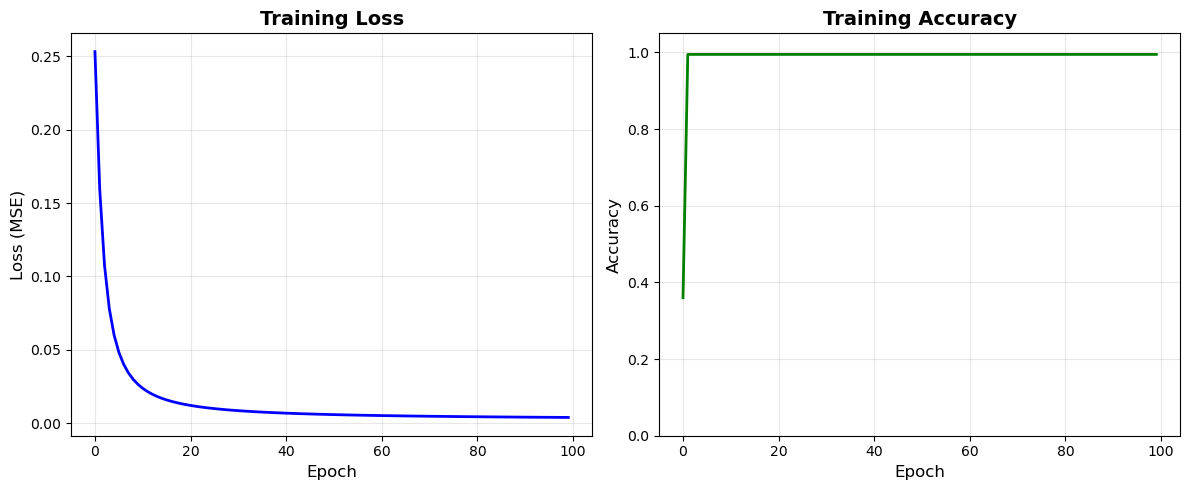

In [4]:
class SimplePerceptron:
    def __init__(self, n_features, learning_rate=0.01):
        """Initialize perceptron with random weights"""
        self.weights = np.random.randn(n_features + 1) * 0.01  # +1 for bias
        self.learning_rate = learning_rate
        self.history = {'loss': [], 'accuracy': []}
    
    def sigmoid(self, z):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))  # Clip to prevent overflow
    
    def predict(self, X):
        """Make predictions"""
        # Add bias term (column of 1s)
        X_with_bias = np.c_[np.ones(X.shape[0]), X]
        z = X_with_bias @ self.weights
        return self.sigmoid(z)
    
    def train(self, X, y, epochs=100):
        """Train the perceptron using gradient descent"""
        n_samples = X.shape[0]
        
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.predict(X)
            
            # Calculate loss (MSE)
            loss = np.mean((y_pred - y) ** 2)
            
            # Calculate accuracy
            y_binary = (y_pred > 0.5).astype(int)
            accuracy = np.mean(y_binary == y)
            
            # Store history
            self.history['loss'].append(loss)
            self.history['accuracy'].append(accuracy)
            
            # Backward pass (gradient descent)
            X_with_bias = np.c_[np.ones(n_samples), X]
            error = y_pred - y
            gradient = (1/n_samples) * X_with_bias.T @ error
            
            # Update weights
            self.weights -= self.learning_rate * gradient
            
            if epoch % 10 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}, Accuracy = {accuracy:.2%}")

# Train our simple perceptron
perceptron = SimplePerceptron(n_features=2, learning_rate=0.1)
perceptron.train(X, y, epochs=100)

# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(perceptron.history['loss'], 'b-', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss (MSE)', fontsize=12)
ax1.set_title('Training Loss', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

ax2.plot(perceptron.history['accuracy'], 'g-', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('Training Accuracy', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

# Visualizing the Decision Boundary

/var/folders/km/gprq92qn29x1rsmyqh3sw00h0000gp/T/ipykernel_16400/2506560936.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(class0_x[:, 0], class0_x[:, 1], c='red', marker='x', s=100,


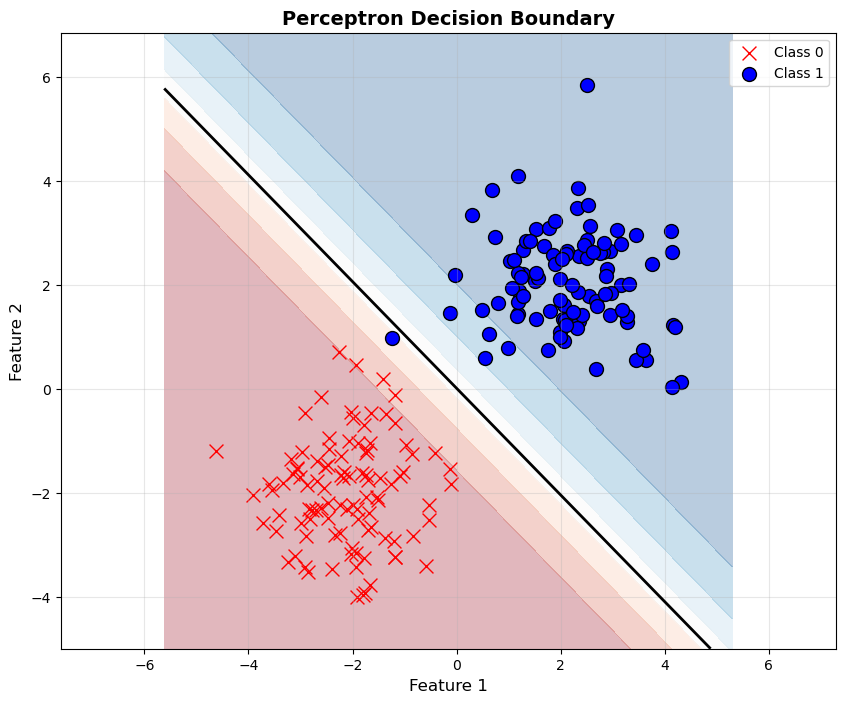

Learned weights: w0 (bias) = -0.020, w1 = 1.125, w2 = 1.098


In [5]:
# Create a mesh to plot decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on mesh points
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

# Plot data points
plt.scatter(class0_x[:, 0], class0_x[:, 1], c='red', marker='x', s=100, 
            label='Class 0', edgecolors='black', linewidths=1)
plt.scatter(class1_x[:, 0], class1_x[:, 1], c='blue', marker='o', s=100, 
            label='Class 1', edgecolors='black', linewidths=1)

plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Perceptron Decision Boundary', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

# Print learned weights
print(f"Learned weights: w0 (bias) = {perceptron.weights[0]:.3f}, "
      f"w1 = {perceptron.weights[1]:.3f}, w2 = {perceptron.weights[2]:.3f}")

# Building a Perceptron with TensorFlow/Keras

Now let's use TensorFlow 2.12 and Keras to build the same perceptron model. We'll implement our own train/test split to avoid external dependencies:

In [6]:
# Import TensorFlow and check version
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(f"TensorFlow version: {tf.__version__}")

# Implement our own train/test split function
def train_test_split(X, y, test_size=0.3, random_state=None):
    """Split data into training and testing sets"""
    if random_state is not None:
        np.random.seed(random_state)
    
    n_samples = X.shape[0]
    n_test = int(n_samples * test_size)
    
    # Create shuffled indices
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    # Split indices
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]
    
    # Split data
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    
    return X_train, X_test, y_train, y_test

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

2025-07-13 13:02:54.400947: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version: 2.12.0
Training set size: 140
Test set size: 60


In [7]:
# Build the perceptron model using Keras
model = keras.Sequential([
    # Single neuron with sigmoid activation
    layers.Dense(1, input_shape=(2,), activation='sigmoid', name='perceptron')
])

# Compile the model
model.compile(
    optimizer='sgd',  # Stochastic Gradient Descent
    loss='mean_squared_error',
    metrics=['binary_accuracy']
)

# Display model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 perceptron (Dense)          (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=10,
    validation_split=0.2,
    verbose=1
)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2%}")

Epoch 1/100
12/12 [==============================] - 0s 12ms/step - loss: 0.1981 - binary_accuracy: 0.6875 - val_loss: 0.1651 - val_binary_accuracy: 0.8214
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1697 - binary_accuracy: 0.7857 - val_loss: 0.1381 - val_binary_accuracy: 0.9286
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1470 - binary_accuracy: 0.8571 - val_loss: 0.1162 - val_binary_accuracy: 0.9286
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1281 - binary_accuracy: 0.8750 - val_loss: 0.0991 - val_binary_accuracy: 0.9643
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1130 - binary_accuracy: 0.8839 - val_loss: 0.0849 - val_binary_accuracy: 0.9643
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1001 - binary_accuracy: 0.9196 - val_loss: 0.0734 - val_binary_accuracy: 1.0000
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - lo

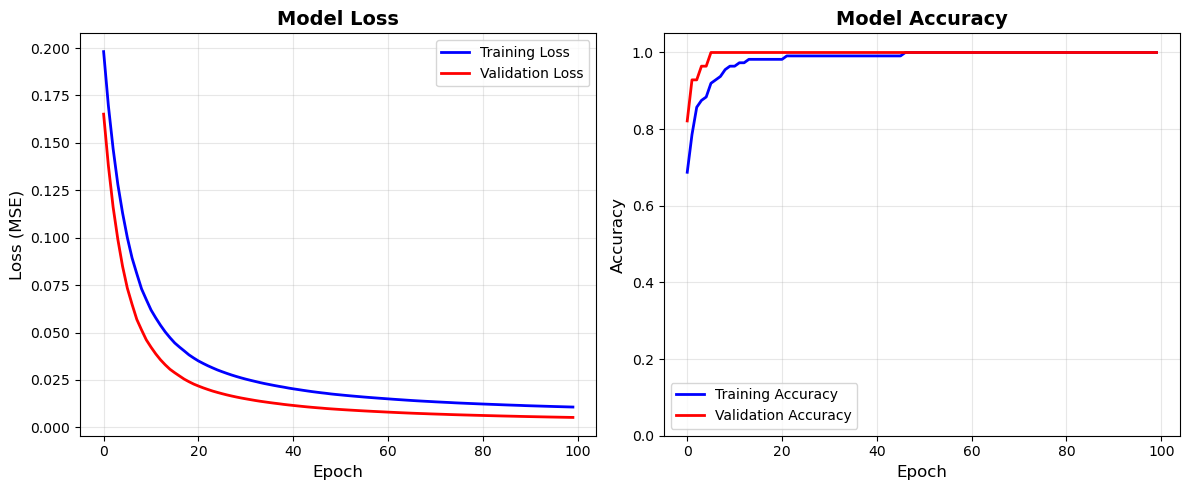

In [9]:
# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
ax1.plot(history.history['loss'], 'b-', label='Training Loss', linewidth=2)
ax1.plot(history.history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss (MSE)', fontsize=12)
ax1.set_title('Model Loss', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy plot
ax2.plot(history.history['binary_accuracy'], 'b-', label='Training Accuracy', linewidth=2)
ax2.plot(history.history['val_binary_accuracy'], 'r-', label='Validation Accuracy', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('Model Accuracy', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

# Visualizing Keras Model Predictions

/var/folders/km/gprq92qn29x1rsmyqh3sw00h0000gp/T/ipykernel_16400/3838872102.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[mask_0, 0], X_test[mask_0, 1], c='red', marker='x', s=100,


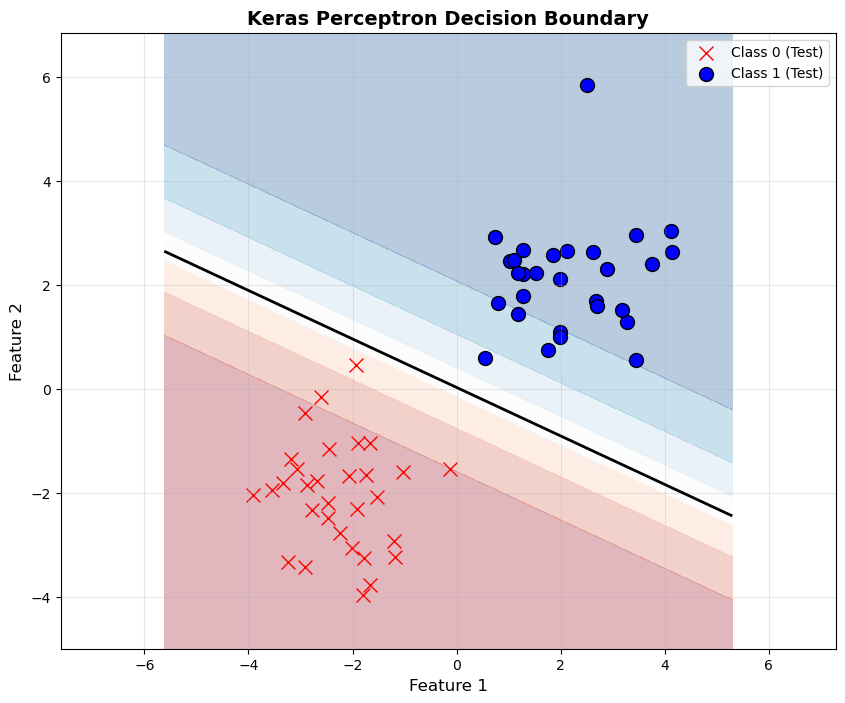


Keras model weights:
w1 = 0.501, w2 = 1.075
bias = -0.037


In [10]:
# Get model predictions on mesh
Z_keras = model.predict(np.c_[xx.ravel(), yy.ravel()], verbose=0)
Z_keras = Z_keras.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z_keras, alpha=0.3, cmap=plt.cm.RdBu)
plt.contour(xx, yy, Z_keras, levels=[0.5], colors='black', linewidths=2)

# Plot test data points
mask_0 = y_test == 0
mask_1 = y_test == 1

plt.scatter(X_test[mask_0, 0], X_test[mask_0, 1], c='red', marker='x', s=100, 
            label='Class 0 (Test)', edgecolors='black', linewidths=1)
plt.scatter(X_test[mask_1, 0], X_test[mask_1, 1], c='blue', marker='o', s=100, 
            label='Class 1 (Test)', edgecolors='black', linewidths=1)

# Make predictions and mark errors
y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int).flatten()
errors = y_pred != y_test
if np.any(errors):
    plt.scatter(X_test[errors, 0], X_test[errors, 1], c='yellow', marker='s', s=200, 
                label='Misclassified', edgecolors='black', linewidths=2)

plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Keras Perceptron Decision Boundary', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

# Get and display the learned weights
weights, bias = model.get_weights()
print(f"\nKeras model weights:")
print(f"w1 = {weights[0, 0]:.3f}, w2 = {weights[1, 0]:.3f}")
print(f"bias = {bias[0]:.3f}")

# Non-linearly Separable Problems

The perceptron can only solve linearly separable problems. Let's see what happens with a non-linearly separable dataset:

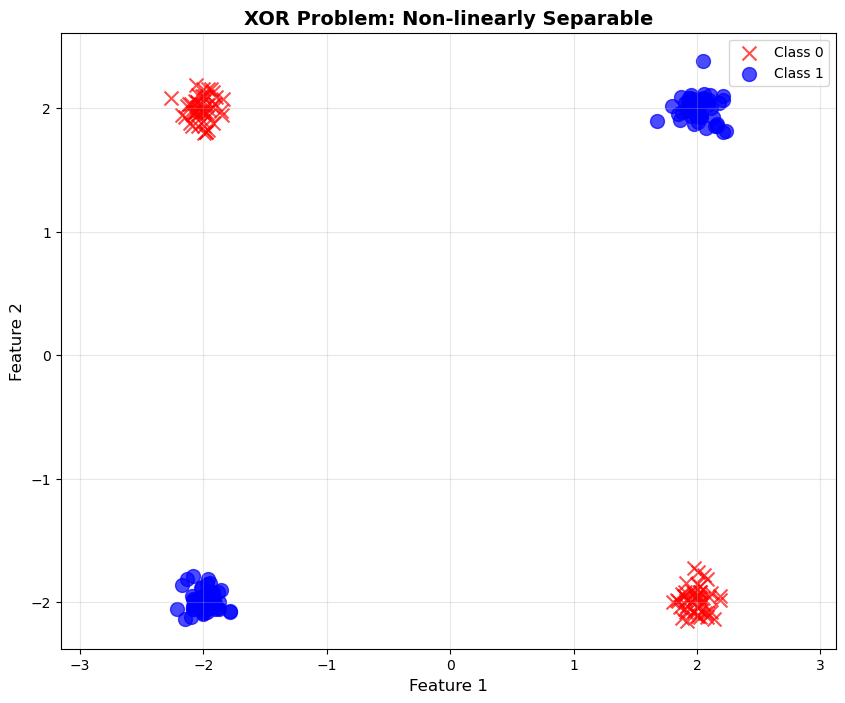

Epoch 0: Loss = 0.2500, Accuracy = 50.00%
Epoch 10: Loss = 0.2500, Accuracy = 50.00%
Epoch 20: Loss = 0.2500, Accuracy = 63.50%
Epoch 30: Loss = 0.2500, Accuracy = 50.00%
Epoch 40: Loss = 0.2500, Accuracy = 50.00%
Epoch 50: Loss = 0.2500, Accuracy = 50.00%
Epoch 60: Loss = 0.2500, Accuracy = 50.00%
Epoch 70: Loss = 0.2500, Accuracy = 50.00%
Epoch 80: Loss = 0.2500, Accuracy = 50.00%
Epoch 90: Loss = 0.2500, Accuracy = 50.00%

Final accuracy on XOR: 50.00%
Note: A single perceptron cannot solve the XOR problem!


In [11]:
# Generate XOR problem (non-linearly separable)
np.random.seed(42)

# Generate data
n_samples_per_cluster = 50
noise = 0.1

# Class 0: top-left and bottom-right
cluster1 = np.random.randn(n_samples_per_cluster, 2) * noise + [-2, 2]
cluster2 = np.random.randn(n_samples_per_cluster, 2) * noise + [2, -2]
X_xor_0 = np.vstack([cluster1, cluster2])
y_xor_0 = np.zeros(2 * n_samples_per_cluster)

# Class 1: top-right and bottom-left
cluster3 = np.random.randn(n_samples_per_cluster, 2) * noise + [2, 2]
cluster4 = np.random.randn(n_samples_per_cluster, 2) * noise + [-2, -2]
X_xor_1 = np.vstack([cluster3, cluster4])
y_xor_1 = np.ones(2 * n_samples_per_cluster)

# Combine data
X_xor = np.vstack([X_xor_0, X_xor_1])
y_xor = np.hstack([y_xor_0, y_xor_1])

# Visualize XOR problem
plt.figure(figsize=(10, 8))
plt.scatter(X_xor_0[:, 0], X_xor_0[:, 1], c='red', marker='x', s=100, 
            label='Class 0', alpha=0.7)
plt.scatter(X_xor_1[:, 0], X_xor_1[:, 1], c='blue', marker='o', s=100, 
            label='Class 1', alpha=0.7)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('XOR Problem: Non-linearly Separable', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

# Try to train a perceptron on XOR
xor_perceptron = SimplePerceptron(n_features=2, learning_rate=0.1)
xor_perceptron.train(X_xor, y_xor, epochs=100)

print(f"\nFinal accuracy on XOR: {xor_perceptron.history['accuracy'][-1]:.2%}")
print("Note: A single perceptron cannot solve the XOR problem!")

# Summary

In this lecture, we've covered:

1. **History of AI**: From automatons to modern deep learning
2. **Machine Learning Paradigms**: Traditional programming vs ML
3. **Classification Problems**: Binary classification with linearly separable data
4. **The Perceptron Model**: 
   - Biological inspiration
   - Mathematical formulation
   - Implementation from scratch
5. **TensorFlow/Keras Implementation**: Building and training neural networks
6. **Limitations**: Single perceptrons can only solve linearly separable problems

## Next Steps

To solve non-linearly separable problems like XOR, we need:
- **Multi-layer Perceptrons (MLPs)**: Networks with hidden layers
- **Non-linear activation functions**: ReLU, tanh, etc.
- **Backpropagation**: Training algorithm for deep networks

These topics will be covered in the next lecture on Deep Neural Networks!

# Exercises

## Exercise 1
Implement a step function activation instead of sigmoid in the SimplePerceptron class. Compare the training behavior and final accuracy with the sigmoid version.

## Exercise 2
Create a 3D dataset (3 features) for binary classification and visualize it. Train a perceptron using Keras with 3 input features.

## Exercise 3
Experiment with different learning rates (0.001, 0.01, 0.1, 1.0) in the Keras perceptron model. Plot the training curves for each learning rate on the same graph.

## Exercise 4
Implement a function that generates a spiral dataset (non-linearly separable). Try to train a perceptron on it and visualize the results.

## Exercise 5
Debug the following code that attempts to create a perceptron with Keras:

In [ ]:
# This code has bugs - fix them!
model = keras.Sequential()
model.add(layers.Dense(1, input_shape=(2), activation='sigmoid'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=10, batch_size=200)

# Issues to fix:
# 1. input_shape should be a tuple
# 2. loss function is wrong for binary classification
# 3. batch_size might be too large
# 4. metric name should match the problem type

# Challenges

## Challenge 1
Create an interactive visualization using matplotlib widgets that allows users to:
- Add data points by clicking (left click for class 0, right click for class 1)
- Train a perceptron in real-time
- See the decision boundary update as training progresses
- Reset the data and weights

## Challenge 2
Implement the perceptron learning algorithm with these enhancements:
1. **Adaptive learning rate**: Decrease learning rate over time
2. **Early stopping**: Stop training when validation loss stops improving
3. **L2 regularization**: Add weight penalty to prevent overfitting
4. **Mini-batch training**: Train on small batches instead of the full dataset

Compare the performance with the basic implementation.

## Challenge 3
Build a multi-class perceptron classifier that can handle more than 2 classes:
- Generate a dataset with 3 or more classes
- Implement one-vs-all classification strategy
- Use softmax activation and categorical crossentropy loss
- Visualize the decision boundaries for all classes
- Compare with Keras multiclass implementation